In [1]:
import csv
import pandas as pd
import numpy as np
import os  
import requests    
from bs4 import BeautifulSoup 
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import snowball
import re
import string
import json
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def verticalsearch(SEFA_url, max_loop):
   
    write_to_file=[]  
    count= 0
    
    start_url=SEFA_url + '/publications/'

    q_list = [start_url]
    
    baseurl = "https://pureportal.coventry.ac.uk/en/organisations/school-of-economics-finance-and-accounting"
 
    while(q_list!=[] and count < max_loop):
        science_url = q_list[0]
        print(science_url)
        q_list= q_list[1:]
        co=0
    
        #Reading HTML text and parsing it
        r = requests.get(science_url)           
        s = BeautifulSoup(r.content, "html.parser")   
        print("soup object")
        
        data=s.find_all("div",{'class':"result-container"})

        #reading information about journals such as title of journal, 
        for info in data:
            #checking author is from CU or not
            publisher_name=[]   
            publisher_link=[]
            
            indiv_result={}
            
            author_details= info.find_all("a", class_="link person")
            
            for a in author_details:
                if(a.get('href')!=[]):
                    pro_link = a.get('href')
                    author=a.string
                    print(author)

                    publisher_name.append(author)

                    publisher_link.append(pro_link)

                    #print(author , "-" , pro_link)
                    indiv_result['Authors']=publisher_name
                    indiv_result['Profile']=publisher_link
            
            if(publisher_name!=[]):
                p_name= info.find("h3", class_="title").text
                #print(p_name)
                indiv_result['Journal name']=p_name
                co= co+1
                print(co)

                p_link = info.find("a", class_="link").get('href')
                #print(p_link)
                indiv_result['Journal URL']= p_link

                p_date=info.find("span", class_="date").text
                #print(p_date)
                indiv_result['Publishing Date']= p_date

                write_to_file.append(indiv_result)
        
        #Next page link
        next_page=s.find("a", class_="nextLink")
        
        if(next_page!= None):

            next_page_link=next_page.get('href')
            
            
            next_page_link = baseurl + '/' + next_page_link.split('/')[4] + '/' + next_page_link.split('/')[5]

            print("Link added to queue for next page is: ", next_page_link)
            
            q_list.append(next_page_link) 

        
        
        #making outputs csv file
        output = open('output.csv', 'w', encoding="utf-8")
        labels=['Authors','Profile','Journal name','Journal URL','Publishing Date']
        
        writer = csv.DictWriter(output, fieldnames=labels)
        writer.writeheader()
        
        for r in write_to_file:
            writer.writerow(r)
        output.close()
        
        count+= 1
    
        


In [65]:
input_craw=int(input("Enter 1 to run crawler or 2 to continue from saved output file"))
if (input_craw==1):
    verticalsearch('https://pureportal.coventry.ac.uk/en/organisations/school-of-economics-finance-and-accounting',50)
elif (input_craw==2):
    if(os.path.exists("output.csv")):
        print("Search started from initially saved Crawler optput")
    else: 
        print("Need crawler first.")
else:
       print("invalid response.")

Enter 1 to run crawler or 2 to continue from saved output file3
invalid response.


In [9]:
#Reading csv file and storing contents in dataframe
vertical_author_data=pd.read_csv("output.csv")
vertical_author_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Authors          390 non-null    object
 1   Profile          390 non-null    object
 2   Journal name     390 non-null    object
 3   Journal URL      390 non-null    object
 4   Publishing Date  390 non-null    object
dtypes: object(5)
memory usage: 15.4+ KB


In [10]:
vertical_author_data

,Authors,Profile,Journal name,Journal URL,Publishing Date
0,"['Hasan, R.']",['https://pureportal.coventry.ac.uk/en/persons...,A bibliometric review of the Waqf literature,https://pureportal.coventry.ac.uk/en/publicati...,Jun 2022
1,"['Hasan, R.']",['https://pureportal.coventry.ac.uk/en/persons...,A note on COVID-19 instigated maximum drawdown...,https://pureportal.coventry.ac.uk/en/publicati...,May 2022
2,"['Zarei, A.']",['https://pureportal.coventry.ac.uk/en/persons...,Bank stock valuation theories: do they explain...,https://pureportal.coventry.ac.uk/en/publicati...,1 Mar 2022
3,"['Yu, M.']",['https://pureportal.coventry.ac.uk/en/persons...,CEO Duality and Firm Performance: A Systematic...,https://pureportal.coventry.ac.uk/en/publicati...,25 May 2022
4,"['Nguyen, T.', 'Nguyen, T.', 'Andrikopoulos, P.']",['https://pureportal.coventry.ac.uk/en/persons...,CEO Financial Experience and Firms’ Earnings M...,https://pureportal.coventry.ac.uk/en/publicati...,7 Mar 2022
...,...,...,...,...,...
385,"['Tanna, S.']",['https://pureportal.coventry.ac.uk/en/persons...,Accounting for total factor productivity growt...,https://pureportal.coventry.ac.uk/en/publicati...,2002
386,"['Tanna, S.']",['https://pureportal.coventry.ac.uk/en/persons...,Assessing efficiency differences between Thai ...,https://pureportal.coventry.ac.uk/en/publicati...,2000
387,"['Tanna, S.']",['https://pureportal.coventry.ac.uk/en/persons...,"Human resources, dotcoms and the new economy",https://pureportal.coventry.ac.uk/en/publicati...,2000
388,"['Tanna, S.']",['https://pureportal.coventry.ac.uk/en/persons...,Informatisation in the European Union: A compa...,https://pureportal.coventry.ac.uk/en/publicati...,1999


In [12]:
#Pre-processing
import re
import string
cleaning_journal = []
for t in vertical_author_data['Journal name']:
    # Removing Unicode
    clean_heading = re.sub(r'[^\x00-\x7F]+', '', t)
    # Removing Mentions
    clean_heading = re.sub(r'@\w+', '', clean_heading)
    # Converting into lowercase
    clean_heading= clean_heading.lower()
    # Removing punctuations
    clean_heading= re.sub(r'[%s]' % re.escape(string.punctuation), '', clean_heading)
    #removing stop words
    stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = stop.sub('', clean_heading)
    cleaning_journal.append(text)
    
print(cleaning_journal)

['bibliometric review waqf literature', 'note covid19 instigated maximum drawdown islamic markets versus conventional counterparts', 'bank stock valuation theories explain prices based theories', 'ceo duality firm performance systematic review research agenda', 'ceo financial experience firms earnings management importance experience specificity', 'ceo tenure cost debt', 'cheating behaviour among opec memberstates oil price fairness stability empirical analysis', 'clinicians informal acquisition accounting literacy uk clinical commissioning groups', 'competing institutional logics power dynamics islamic financial reporting standardisation projects', 'corporate governance ifsb standard4 evidence islamic banks bangladesh', 'corporate hedging cost equity capital', 'corporate social responsibility  firm efficiency evidence endogenous cost inefficiency stochastic frontier analysis', 'corporate social responsibility financial performance product servicebased firms listed london stock exchang

In [14]:
#Stemming and removing stop words
cleaning_corpus=[]
for i in cleaning_journal:
    t=word_tokenize(i)
    ste_word=[]
    
    for word in t:
      
        if word not in stopwords.words("english"):
            
            if(word.isalpha()):
                
                s = PorterStemmer()
                ste_word.append(s.stem(word))
                doc=' '.join(ste_word)
    
    cleaning_corpus.append(doc)

print(cleaning_corpus)

['bibliometr review waqf literatur', 'note instig maximum drawdown islam market versu convent counterpart', 'bank stock valuat theori explain price base theori', 'ceo dualiti firm perform systemat review research agenda', 'ceo financi experi firm earn manag import experi specif', 'ceo tenur cost debt', 'cheat behaviour among opec memberst oil price fair stabil empir analysi', 'clinician inform acquisit account literaci uk clinic commiss group', 'compet institut logic power dynam islam financi report standardis project', 'corpor govern ifsb evid islam bank bangladesh', 'corpor hedg cost equiti capit', 'corpor social respons firm effici evid endogen cost ineffici stochast frontier analysi', 'corpor social respons financi perform product servicebas firm list london stock exchang', 'determin inform entrepreneurship africa', 'diffus theori transnat anteced intern standard audit adopt around world', 'dissect effect famili busi exposur entrepreneuri implement intent', 'famili ownership matter

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
vector = v.fit_transform(cleaning_corpus)
feature_names = v.get_feature_names()
#names = v.get_names()
d_dense = vector.todense()
d_list = d_dense.tolist()
tfidf_vector= pd.DataFrame(d_list, columns=feature_names)


In [22]:
tfidf_vector

,aaoifi,abl,abm,abroad,abu,academ,academi,access,account,accountingbas,...,worldwid,yabanc,yatrm,yatrmlar,year,yellow,zapomoc,zeffirelli,zerinden,znaczeni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
Query=True
while Query:
    score={}
    q=input('enter a keyword\n')
    if q == 'NULL':
        break
    print('\n')
    token_words=word_tokenize(q)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(s.stem(word))
        Query=' '.join(stem_sentence)
    q=Query.split()
    print(q)
    print('\n')
    Sum=list()

    for i in range(len(cleaning_corpus)):
        total=0
        for j in range(len(q)):
            try:
                t=q[j]
                total+=tfidf.iloc[i][t]
            except KeyError:
                total+=0
            #print(tf_idf[i,t])
        Sum.insert(i,total)
    #print(Sum)
    max_value = max(Sum)
    a=( sorted( [(x,i) for (i,x) in enumerate(Sum)], reverse=True )[:3] )
    pd.set_option('display.max_colwidth', None)
    for i in range(len(a)):
        max_index=a[i][1]
        print(vertical_author_data.iloc[max_index])
        print('\n')

enter a keyword
covid


['covid']


Authors                                                                                                                    ['Tanna, S.']
Profile                                                                   ['https://pureportal.coventry.ac.uk/en/persons/sailesh-tanna']
Journal name                                                           Developing a comprehensive cross-country economic growth database
Journal URL        https://pureportal.coventry.ac.uk/en/publications/developing-a-comprehensive-cross-country-economic-growth-database-2
Publishing Date                                                                                                                     1997
Name: 389, dtype: object


Authors                                                                                                                    ['Tanna, S.']
Profile                                                                   ['https://pureportal.coventry.ac.uk/en/pe

# Task-2: Document Clustering

In [26]:
pip install feedparser

  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=e2a0e231f63fafba04361dfc8d8b216fbd001cab7f3b15e69a2699c73088b601
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\65\7a\a7\78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built sgmllib3k
Note: you may need to restart the kernel to use updated packages.


In [27]:
import feedparser
text=[]
site_data= pd.DataFrame(columns=('texts','labels'))

Politics = feedparser.parse("http://feeds.bbci.co.uk/news/politics/rss.xml")
Health = feedparser.parse("http://feeds.bbci.co.uk/news/health/rss.xml")
Sports = feedparser.parse("https://feeds.bbci.co.uk/sport/rss.xml")

for i in Politics.entries:
    x= i.summary
    
    site_data= site_data.append({'texts': x,'labels':'politics'}, ignore_index=True)

for i in Health.entries:
    x= i.summary
    site_data= site_data.append({'texts': x,'labels':'Health'}, ignore_index=True)

for i in Sports.entries:
    x= i.summary
    site_data = site_data.append({'texts': x,'labels':'sport'}, ignore_index=True)


In [28]:
site_data

,texts,labels
0,"Tax cut plans mean higher borrowing or lower public spending, or both, says the Institute for Fiscal Studies.",politics
1,The former chancellor says new restrictions were hours away from being announced in December 2021.,politics
2,Rishi Sunak and Liz Truss will both feel they have something to prove before voters start casting their ballots.,politics
3,"The investigation into whether he broke Covid rules was a daily burden, the Labour leader says.",politics
4,Boris Johnson's successor will be either Liz Truss or Rishi Sunak - find out what they plan to do if they win.,politics
...,...,...
161,Watch Ian Wright and Alex Scott's reaction to England's Georgia Stanway extra-time winner against Spain in their Euro 2022 quarter-final at Brighton's Amex Stadium.,sport
162,British heavyweight fighter Tom Aspinall tells how he went from having £20 in the bank to being a UFC headliner.,sport
163,England book their place in the semi-finals of Euro 2022 thanks to Georgia Stanway's superb extra-time winner against Spain at Brighton's Amex Stadium.,sport
164,Watch as World Athletics Championships Oregon22 mascot Legend the Bigfoot challenges hurdles gold medallist Alison dos Santos to a dance-off.,sport


In [37]:
site_data['labels'].unique()

array(['politics', 'Health', 'sport'], dtype=object)

In [38]:
website_folders = ["politics","sport","Health"]

In [39]:
paths = []
for i in website_folders:
    paths.append(os.getcwd()+'\\'+'bbc'+'\\'+i)

In [40]:
texts = []
labels = []

In [41]:
for path in paths:
#     getting filenames one by one from the list of all files under a directory called path
    for filename in os.listdir(path):
#         opening the file in read only mode with encoding latin1
        with open(path+"\\"+filename,"r", encoding = "latin") as file:
#             after reading the file contents are stored in a variable called data
            data = file.read()
#             after removing all newline characters and carriage return from the  data,
#             it is being added at the end of the list texts
            data = data.replace("\n"," ").replace('\r','')
            texts.append(data)
            file.close() # file is being closed
#         setting the category of the news as the folder name in which it reside  
        labels.append(os.path.basename(path))

In [42]:
# creating a pandas dataframe with texts and labels
site_data1= pd.DataFrame({'texts':texts,'labels':labels})

In [43]:
frames = [site_data1, site_data]

In [44]:
df = pd.concat(frames)

In [45]:
df

,texts,labels
0,"Labour plans maternity pay rise Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt. It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected. Ms Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra Â£1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children. The Shadow Secretary of State for the Family, Theresa May, said: ""These plans were announced by Gordon Brown in his pre-budget review in December and Tony Blair is now recycling it in his desperate bid to win back women voters."" She said the Conservatives would announce their proposals closer to the General Election. Liberal Democrat spokeswoman for women Sandra Gidley said: ""While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected."" She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time. Ms Hewitt also stressed the plans would be paid for by taxpayers, not employers. But David Frost, director general of the British Chambers of Commerce, warned that many small firms could be ""crippled"" by the move. ""While the majority of any salary costs may be covered by the government's statutory pay, recruitment costs, advertising costs, retraining costs and the strain on the company will not be,"" he said. Further details of the government's plans will be outlined on Monday. New mothers are currently entitled to 90% of average earnings for the first six weeks after giving birth, followed by Â£102.80 a week until the baby is six months old.",politics
1,"Watchdog probes e-mail deletions The information commissioner says he is urgently asking for details of Cabinet Office orders telling staff to delete e-mails more than three months old. Richard Thomas ""totally condemned"" the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 January. Government guidance said e-mails should only be deleted if they served ""no current purpose"", Mr Thomas said. The Tories and the Lib Dems have questioned the timing of the new rules. Tory leader Michael Howard has written to Tony Blair demanding an explanation of the new rules on e-mail retention. On Monday Lib Dem constitutional affairs committee chairman Alan Beith warned that the deletion of millions of government e-mails could harm the ability of key probes like the Hutton Inquiry. The timing of the new rules just before the Freedom of Information Act comes into forces was ""too unlikely to have been a coincidence"", Mr Beith said. But a Cabinet Office spokeswoman said the move was not about the new laws or ""the destruction of important records"". Mr Beith urged the information commissioner to look at how the ""e-mail regime"" could ""support the freedom of information regime"". Mr Thomas said: ""The new Act of Parliament makes it very clear that to destroy records in order to prevent their disclo

In [46]:
from sklearn.preprocessing import LabelEncoder
# Encoding the categories with integer
df["labels_to_category"] = LabelEncoder().fit_transform(df["labels"])
# verfing by printing dataframe
df

,texts,labels,labels_to_category
0,"Labour plans maternity pay rise Maternity pay for new mothers is to rise by Â£1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt. It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected. Ms Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra Â£1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children. The Shadow Secretary of State for the Family, Theresa May, said: ""These plans were announced by Gordon Brown in his pre-budget review in December and Tony Blair is now recycling it in his desperate bid to win back women voters."" She said the Conservatives would announce their proposals closer to the General Election. Liberal Democrat spokeswoman for women Sandra Gidley said: ""While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected."" She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time. Ms Hewitt also stressed the plans would be paid for by taxpayers, not employers. But David Frost, director general of the British Chambers of Commerce, warned that many small firms could be ""crippled"" by the move. ""While the majority of any salary costs may be covered by the government's statutory pay, recruitment costs, advertising costs, retraining costs and the strain on the company will not be,"" he said. Further details of the government's plans will be outlined on Monday. New mothers are currently entitled to 90% of average earnings for the first six weeks after giving birth, followed by Â£102.80 a week until the baby is six months old.",politics,1
1,"Watchdog probes e-mail deletions The information commissioner says he is urgently asking for details of Cabinet Office orders telling staff to delete e-mails more than three months old. Richard Thomas ""totally condemned"" the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 January. Government guidance said e-mails should only be deleted if they served ""no current purpose"", Mr Thomas said. The Tories and the Lib Dems have questioned the timing of the new rules. Tory leader Michael Howard has written to Tony Blair demanding an explanation of the new rules on e-mail retention. On Monday Lib Dem constitutional affairs committee chairman Alan Beith warned that the deletion of millions of government e-mails could harm the ability of key probes like the Hutton Inquiry. The timing of the new rules just before the Freedom of Information Act comes into forces was ""too unlikely to have been a coincidence"", Mr Beith said. But a Cabinet Office spokeswoman said the move was not about the new laws or ""the destruction of important records"". Mr Beith urged the information commissioner to look at how the ""e-mail regime"" could ""support the freedom of information regime"". Mr Thomas said: ""The new Act of Parliament makes it very clear that to destroy records in order to

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [56]:
topics = ["politics","sport","Health"]

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [67]:
train.shape

(1462, 3)

In [68]:
test.shape

(366, 3)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train['texts'],train['labels_to_category'])
labels=model.predict(test['texts'])

Text(89.133125, 0.5, 'predicted label')

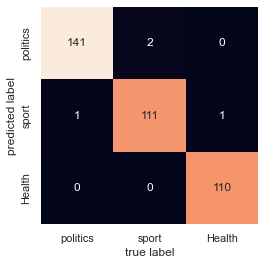

In [59]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test['labels_to_category'],labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=topics,yticklabels=topics)

#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [60]:
topics = ["Health","politics","sport"]

In [61]:
def predict_topic_withcluster(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return topics[pred[0]]

In [72]:
predict_topic_withcluster('sidesteps Davis Cup in 2005')

[2]


'sport'

In [71]:
predict_topic_withcluster('"If in doubt retain, that has been the long-standing principle of the civil service and public authorities')

[1]


'politics'